# Youtube Data Analysis and 2019 Data Predictions
## CMSC320
### By Rachel Taskale

Social media and content that we consume reflects the current trends and interests of the population. As a person who grew up during the birth and growth of Youtube, most of my childhood was spent watching Youtube videos. This helped to shape my interests, views, and ideals throughout my life and the same goes for many others. 

However, the Youtube Trending page is a part of Youtube that does not reflect just my own interests like the Youtube homepage does. It reflects an entire popoulation of people, determined by the country.

In this Data Science Tutorial, I will walk you through the Data Science pipeline of data curation and management, exploratory data analysis, hypothesis testing and machine learning.


*Disclaimer to Grader:*
One of the tables that I used gets updated daily, therefore, it may have slightly different numbers than what I have. However, unless something "breaks the internet" a.k.a goes viral before my grading is complete, all of the graphs should be able to be recreated.


In [682]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## About The Data:
The first dataset that I'm using for the final project is 2017-2018 data on Youtube Trending Videos from Kaggle
The reference page to the data was: https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv

The second dataset that I am using for the final project is 2020-2021 data on Youtube Trending Videos, also from Kaggle.
The reference page to the data was: https://www.kaggle.com/rsrishav/youtube-trending-video-dataset
and it was the US data.

The way I interpreted the data:
Upon observing the dataset content, I took everything in relation to when it was posted to the trending page, rather than what the current stats are. That is, if a video gets put onto the trending page, the view count, likes, dislikes, and comments for the now trending video would stop.


Citations:
    J, M. (2019, June 2). Trending YouTube Video Statistics. https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv. 
    Sharma, R. (2021, May 17). YouTube Trending Video Dataset (updated daily). Kaggle. https://www.kaggle.com/rsrishav/youtube-trending-video-dataset. 


    

| Category ID      | Subject |
| ----------- | ----------- |
| 1      | Film & Animation       |
| 2   | Autos & Vehicles        |
| 10   | Music        |
| 15   | Pets & Animals        |
| 17  | Sports        |
| 18  | Short Movies        |
| 19  | Travel & Events        |
| 20   | Gaming        |
| 21  | Videoblogging        |
| 22   |  People & Blogs        |
| 23  |    Comedy     |
| 24   |   Entertainment   |
| 25   |   News & Politics        |
| 26   |   Howto & Style        |
| 27   |   Education        |
| 28   |   Science & Technology        |
| 29   |   Nonprofits & Activism        |
| 30   |   Movies        |
| 31   |   Anime/Animation        |
| 32   |   Action/Adventure        |
| 33   |   Classics                |
| 34   |   Comedy                |
| 35   |   Documentary           |
| 36   |   Drama                 |
| 37   |   Family                |
| 38   |   Foreign               |
| 39   |   Horror                |
| 40   |   Sci-Fi/Fantasy        |
| 41   |   Thriller              |
| 42   |   Shorts                |
| 44   |   Trailers              |



    

In [683]:
#Read the csv files
yr17_18_data = pd.read_csv("17_18_data.csv")
yr20_21_data = pd.read_csv("20_21_data.csv")

In [684]:
#Observe the 2017-2018 data
yr17_18_data.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [685]:
#Observe the 2020-2021 data
yr20_21_data.head()

video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
3  2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg            XXL          10   
4  2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate          26   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   
2  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
3  2020-08-12T00:00:00Z  xxl freshman|xxl freshmen|2020 xxl freshman|20...   
4  2020-08-12T00:00:00Z  The LaBrant Family|DIY|Interior Design|Makeove...   

   view_count   likes  dislikes  comment_count  \
0     1514614  156908      5855          35313   
1     2381688  146739      2794          16549   
2     2038853  353787      2628          40221   
3      496771   23251      1856           7647   
4     1123889   45802       964           2196   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg              False   
1  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg              False   
2  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg              False   
3  https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg              False   
4  https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg              False   

   ratings_disabled                                        description  
0             False  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...  
1             False  While running her own modding shop, Ramya Pare...  
2             False  I left youtube for a month and this is what ha...  
3             False  Subscribe to XXL → http://bit.ly/subscribe-xxl...  
4             False  Transforming The LaBrant Family's empty white ...

## Cleaning the Data:
Since I decided to take two different tables, for future reference, I needed to combine them in to one large table for convience. Upon observation, it was clear that the two tables were in different formats with different column names to represent the same subjects, therefore, I created a new table in an order that I felt usable and combined all the data. 

As a part of the cleaning, I standardized the trending date data into datetime type and removed duplicate data.

1. We remove make all the new columns in our total_data set. Then I also changed over all the data from whatever format they were before, to datetime so it was easier to use. 

In [686]:
# I'm going to make a new table in the correct order so it will be easier to combine with the 2017-2018 data

total_data = pd.DataFrame(columns = ['video_id', 'title', 'publish_time', 'channel_title', 'category_id', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled' ,'description'])

#Converted the trending_date data from Series to 
yr20_21_data['publishedAt'] = pd.to_datetime(yr20_21_data['publishedAt'], ).dt.tz_localize(None)
yr17_18_data['publish_time'] = pd.to_datetime(yr17_18_data['publish_time']).dt.tz_localize(None)
yr20_21_data['trending_date'] = pd.to_datetime(yr20_21_data['trending_date']).dt.tz_localize(None)
yr17_18_data['trending_date'] = pd.to_datetime(yr17_18_data['trending_date'], format='%y.%d.%m').dt.tz_localize(None)


2. I merged the two tables together by creating a new pandas table with standard names. The difficulty in this was that the two different tables had similar, but different names in each of the tables, also they were in different orders so it led to hard code wrangling

In [687]:
total_data['video_id'] = yr20_21_data['video_id'].append(yr17_18_data['video_id'])
total_data['trending_date'] = yr20_21_data['trending_date'].append(yr17_18_data['trending_date'])
total_data['title'] = yr20_21_data['title'].append(yr17_18_data['title'])
total_data['channel_title'] = yr20_21_data['channelTitle'].append(yr17_18_data['channel_title'])
total_data['category_id'] = yr20_21_data['categoryId'].append(yr17_18_data['category_id'])
total_data['publish_time'] = yr20_21_data['publishedAt'].append(yr17_18_data['publish_time'])
total_data['tags'] = yr20_21_data['tags'].append(yr17_18_data['tags'])
total_data['view_count'] = yr20_21_data['view_count'].append(yr17_18_data['views'])
total_data['likes'] = yr20_21_data['likes'].append(yr17_18_data['likes'])
total_data['dislikes'] = yr20_21_data['dislikes'].append(yr17_18_data['dislikes'])
total_data['comment_count'] = yr20_21_data['comment_count'].append(yr17_18_data['comment_count'])
total_data['comments_disabled'] = yr20_21_data['comments_disabled'].append(yr17_18_data['comments_disabled'])
total_data['ratings_disabled'] = yr20_21_data['ratings_disabled'].append(yr17_18_data['ratings_disabled'])
total_data['description'] = yr20_21_data['description'].append(yr17_18_data['description'])


3. When I initially entered the data into the table, I made sure to enter in the 2021 data first because it's the most up to date. Then I decided to remove the latter added (2017-2018) duplicate to avoid dulipcate code.  

In [688]:
total_data = total_data.drop_duplicates(subset = ['video_id','title'], keep = "first")
total_data['publish_time']

0       2020-08-11 19:20:14
1       2020-08-11 17:00:10
2       2020-08-11 16:34:06
3       2020-08-11 16:38:55
4       2020-08-11 15:10:05
                ...        
40760   2018-06-12 18:55:26
40761   2018-06-13 15:06:08
40762   2018-06-13 05:27:27
40764   2018-06-12 16:03:58
40766   2018-06-13 09:00:06
Name: publish_time, Length: 16090, dtype: datetime64[ns]

4. Following the data cleaning, I checked to make sure that there were no null values. Using the .isnull() function, the only place where there appeared to be null values was in the description.

    I decided to convert those null values to "N/A" to create a standard value to refer to no description.

In [689]:
total_data.isnull().sum()

video_id               0
title                  0
publish_time           0
channel_title          0
category_id            0
trending_date          0
tags                   0
view_count             0
likes                  0
dislikes               0
comment_count          0
comments_disabled      0
ratings_disabled       0
description          184
dtype: int64

In [690]:
total_data['description'] = total_data['description'].fillna(value = "N/A")


In [691]:
total_data.describe(include = ['O'])

video_id             title channel_title    tags description
count         16090             16090         16090   16090       16090
unique        15730             16037          4802   13229       15459
top     WQ8Xgp8ALFo  Starlink Mission           NBA  [None]         N/A
freq              6                15           165    1255         184

In [692]:
total_data.head()

video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

         publish_time  channel_title  category_id trending_date  \
0 2020-08-11 19:20:14       Brawadis           22    2020-08-12   
1 2020-08-11 17:00:10   Apex Legends           20    2020-08-12   
2 2020-08-11 16:34:06  jacksepticeye           24    2020-08-12   
3 2020-08-11 16:38:55            XXL           10    2020-08-12   
4 2020-08-11 15:10:05       Mr. Kate           26    2020-08-12   

                                                tags  view_count   likes  \
0  brawadis|prank|basketball|skits|ghost|funny vi...     1514614  156908   
1  Apex Legends|Apex Legends characters|new Apex ...     2381688  146739   
2  jacksepticeye|funny|funny meme|memes|jacksepti...     2038853  353787   
3  xxl freshman|xxl freshmen|2020 xxl freshman|20...      496771   23251   
4  The LaBrant Family|DIY|Interior Design|Makeove...     1123889   45802   

   dislikes  comment_count  comments_disabled  ratings_disabled  \
0      5855          35313              False             False   
1      2794          16549              False             False   
2      2628          40221              False             False   
3      1856           7647              False             False   
4       964           2196              False             False   

                                         description  
0  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...  
1  While running her own modding shop, Ramya Pare...  
2  I left youtube for a month and this is what ha...  
3  Subscribe to XXL → http://bit.ly/subscribe-xxl...  
4  Transforming The LaBrant Family's empty white ...

Here is a head view of what the data now looks like

## EDA
For this section, I wanted to get a deeper understanding of why a video 
For this next part, I first wanted to see what the correlation was for every value against each other to determine what I waned to do look at. 

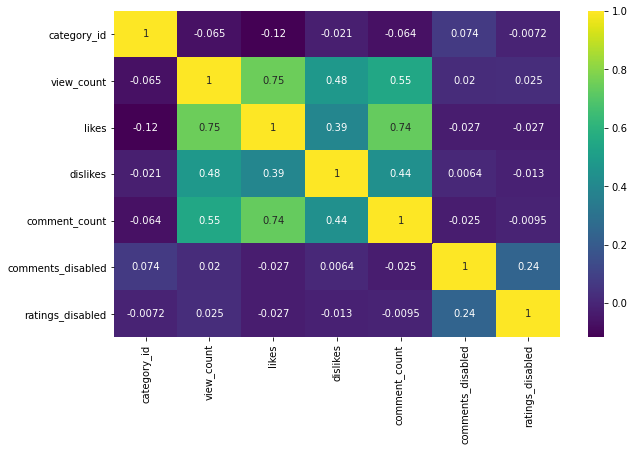

In [693]:

graph = plt.subplots(figsize=(10,6))
corr_map = sns.heatmap(total_data.corr(), annot=True, cmap="viridis")

As you can see, from the graph above, the factors that have the strongest relationship with eachother are ratings disable + comments disabled, comment_count + likes, comment_count + dislikes, dislikes + likes, views + likes, views + dislikes, views + comment_count. For these reasons, I want to initally analyze the relationship between likes, dislikes, comments, and views on from the trending videos.

First, I'm going to analyze channels that are the most frequently on youtube trending overall. This will give us a better idea as to who the leading Youtube channels are.

Text(0.5, 1.0, 'Top 50 trending channels from 2017-2021 (Excluding 2019 data)')

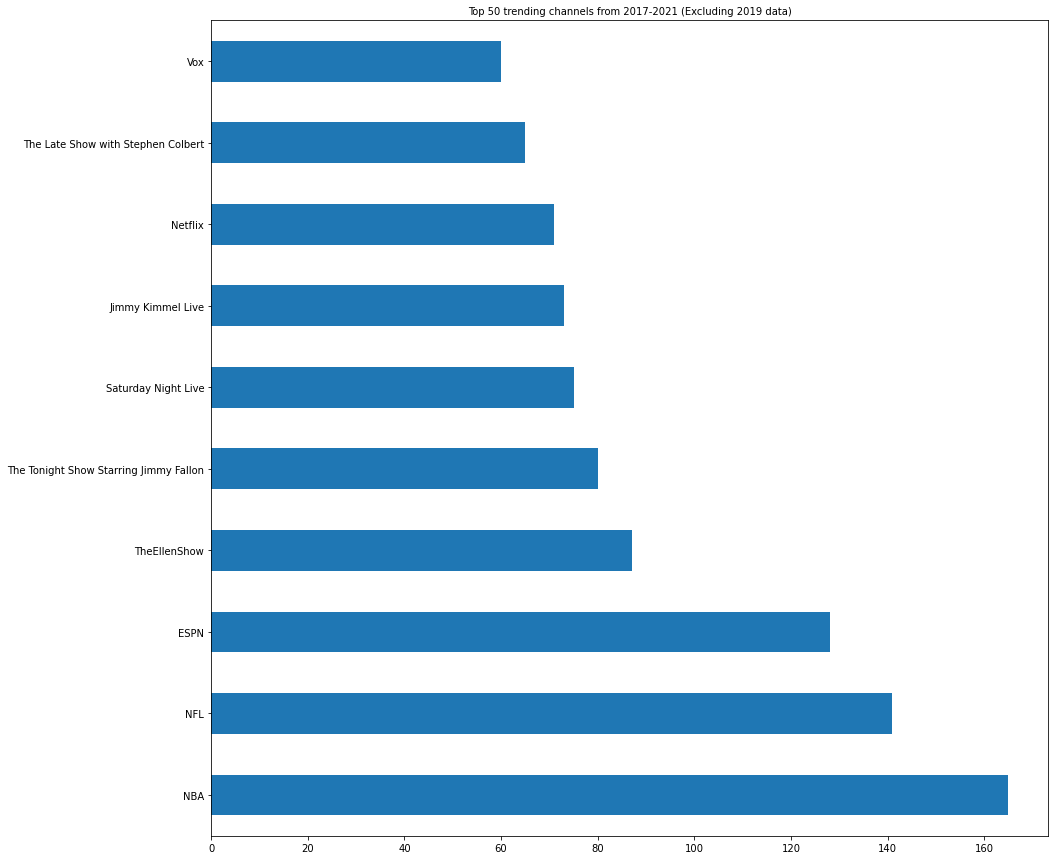

In [695]:
#grouped data by channel title and counted up the number of times appeared on Youtube trending
trending_data_count = total_data.groupby(by = 'channel_title').agg('count')
#sorted from top to bottom
trending_data_count = trending_data_count.sort_values(by = ['video_id'], ascending=False).iloc[:10]
#reset the index
trending_data_count.reset_index(level=0, inplace=True)
#created the plot
g = trending_data_count['video_id'].plot(figsize = (15,15), kind ="barh")
labels = trending_data_count['channel_title']
g.set_yticklabels(labels, fontsize = 10)
plt.title('Top 50 trending channels from 2017-2021 (Excluding 2019 data)', fontsize = 10)
# trending_data_count.plot(figsize = (100,20), rot = 1)

From first glance, it is clear that Youtube's main focus is in high gross areas such as sports, Netflix, and talk shows which tend to generate a lot of content and have high view counts.

In [696]:
##created a function to plot graphs based on the parameters
def top_data (data, type, b, num):
    #sorts and removed duplicates
    view_count_sorted_tb = data.sort_values(by = type, ascending= b ).iloc[:num].drop_duplicates("title",keep="first")
    #get the labels
    channel_titles = view_count_sorted_tb['title']
    ax1 = view_count_sorted_tb[type].plot(figsize = (15,15), kind ="barh")
    
    ax2 = view_count_sorted_tb[['likes', 'dislikes', 'comment_count']].plot(figsize = (10,10), kind ="barh")
    ax1.set_yticklabels(channel_titles, fontsize = 10)
    ax2.set_yticklabels(channel_titles, fontsize = 10)
    

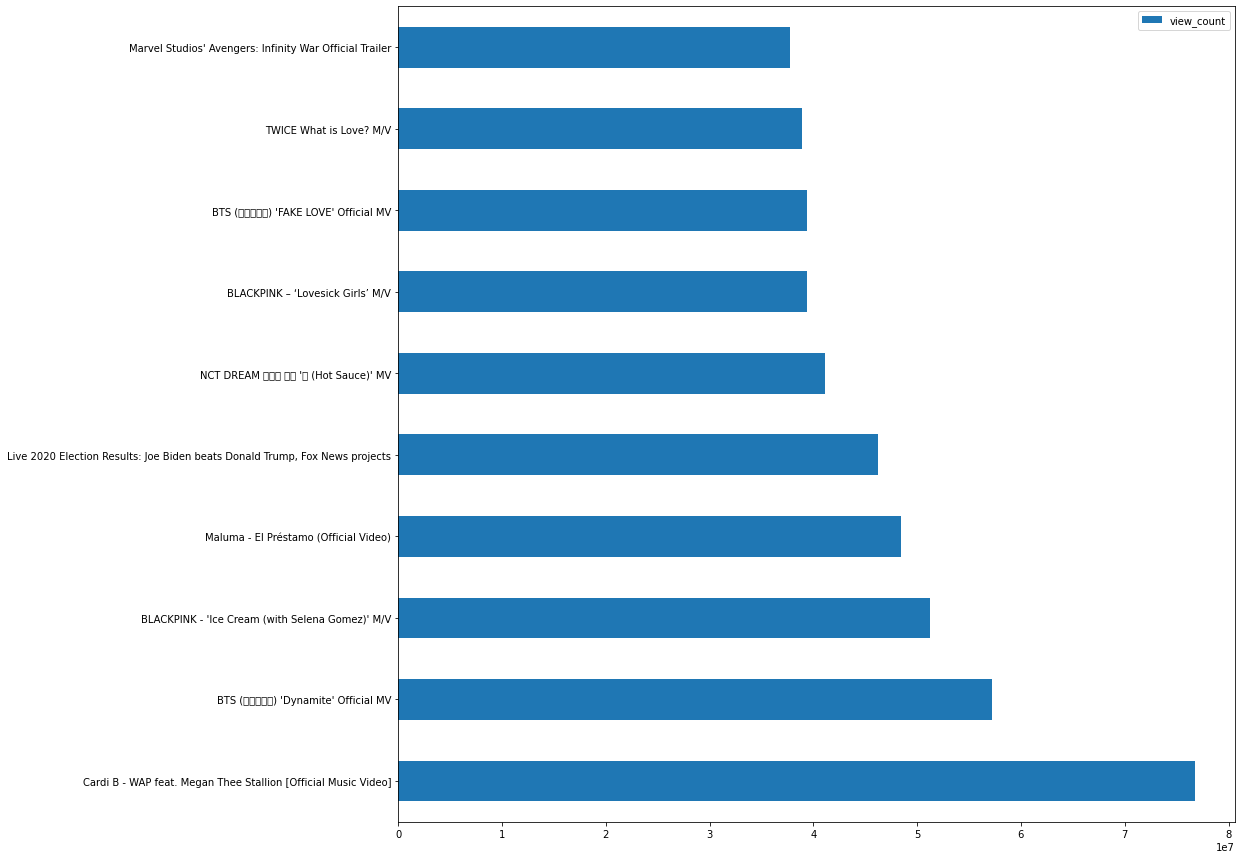

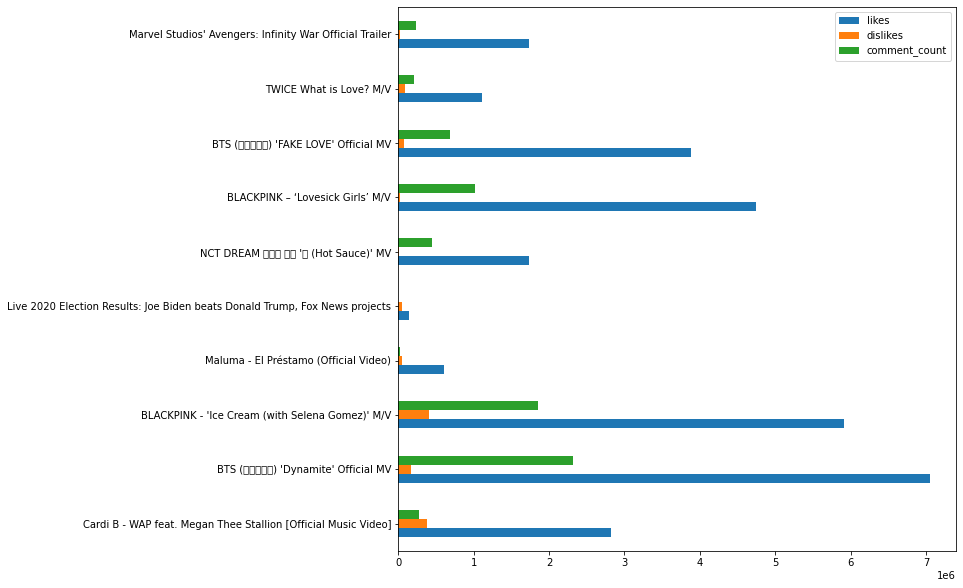

In [697]:
top_data(total_data, ['view_count'], False, 10)

In this, I got the top 10 most watched youtube trending videos across all the data and plotted the number of views, likes, dislikes, and comment count. It is important to note that from my initial assumption about the data that these numbers were recorded at the time that the video was added to trending. Just from observation, you see that both BTS' Dynamite and Cardi B's WAP were not added to trending until they had hundreds of millions of views. An inference that you can make from the this is that international music and controversial music will take a much longer time to be added to Youtube trending due to protection of Youtube image as well as what they believe the American populatio will want to watch.

Specifically in the case of Cardi B adn Megan Thee Stallion's WAP music video, it can be inferred that Youtube did not want to post such an explicit video to a technically "family friendly" website with a predominantly christian and traditional value society to follow.

Also to note that, there appears to be quite a number of K-Pop groups that were not added to trending until they had a significant number of views, including a song with American singer Selena Gomez.

Next I'm going to analyze the top trending videos based on the number of likes

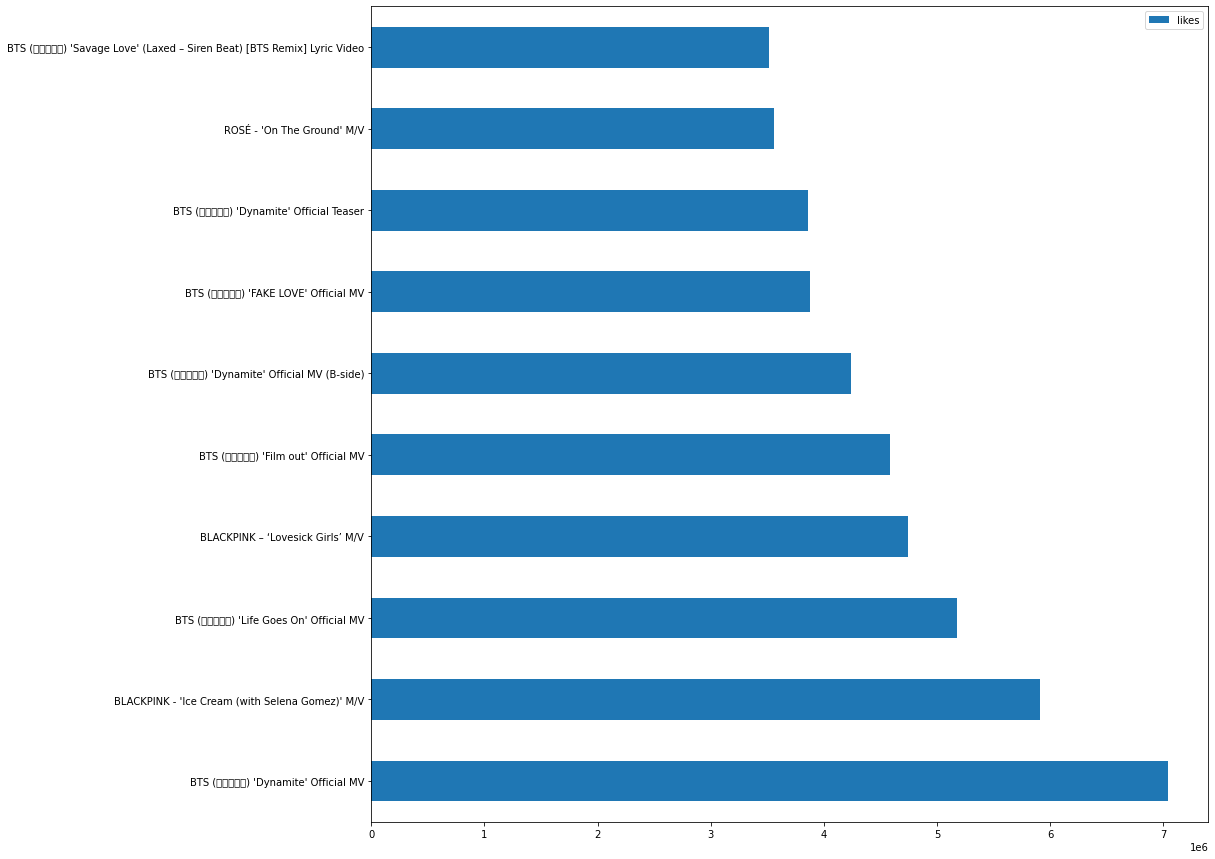

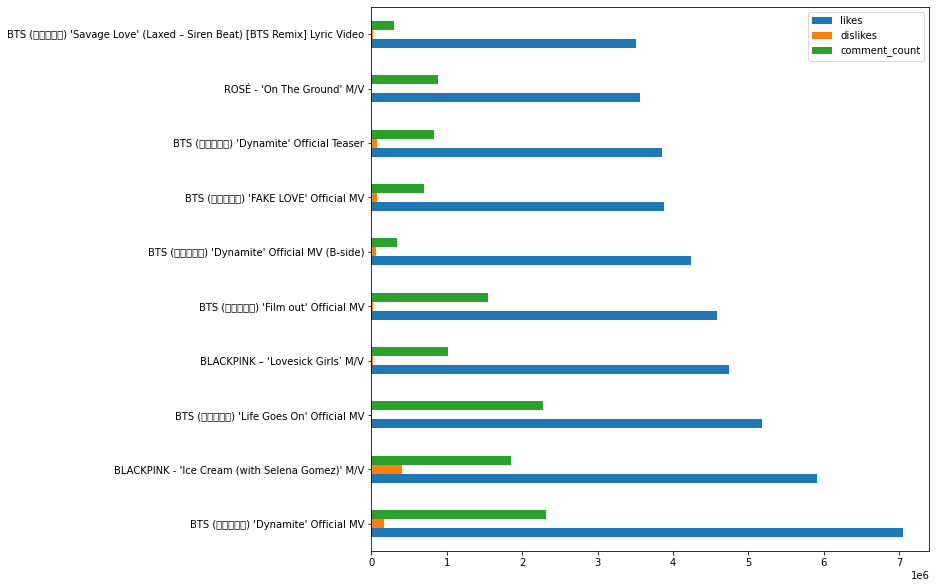

In [727]:
top_data(total_data, ['likes'], False, 10)


It appears that nearly every single song on top likes graphs are in fact K-Pop groups, with BTS nearly taking the entire graph themselves. From this we can infer that American Youtube watchers really like K-Pop

Now let's look at the top videos based on dislikes.

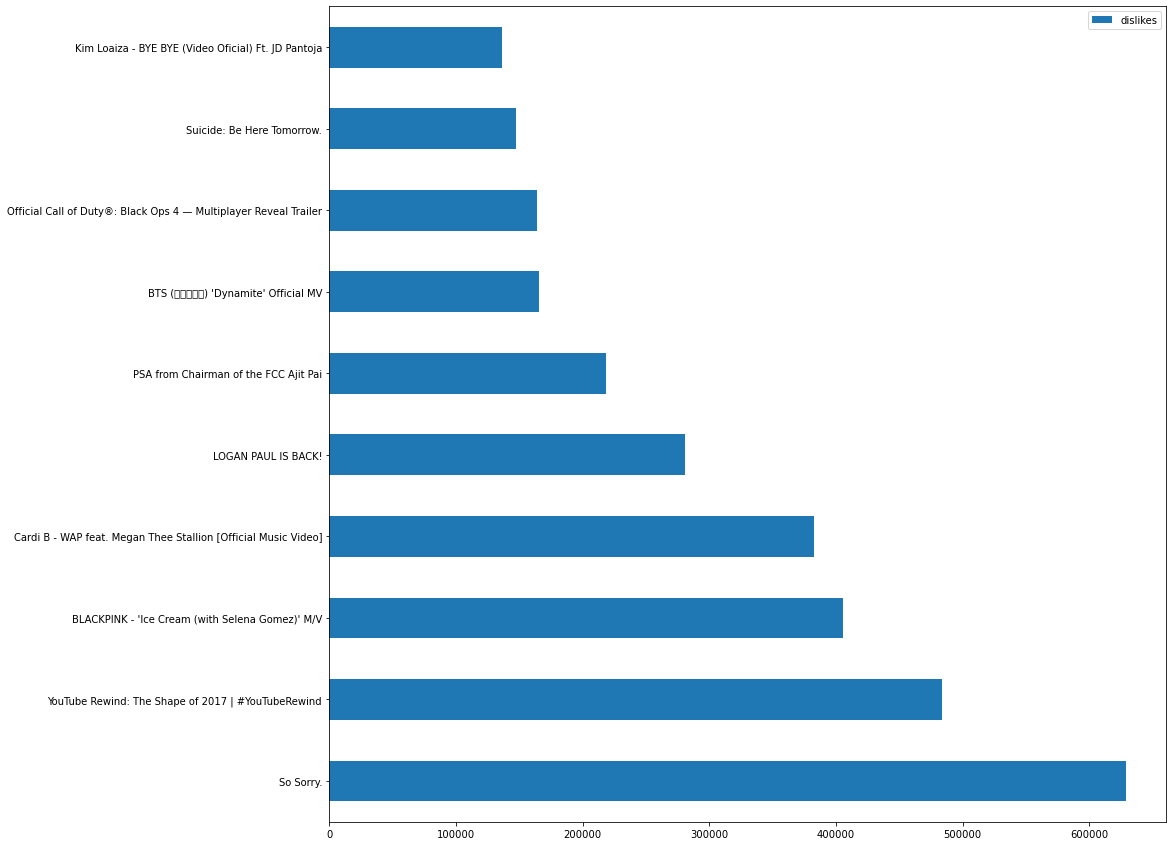

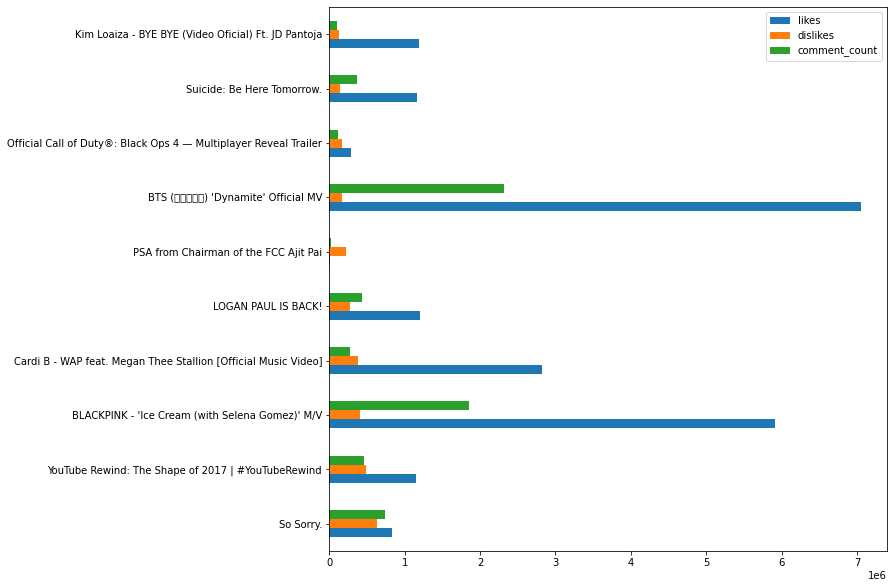

In [699]:
top_data(total_data, ['dislikes'], False, 10)

Based on the graph it is evident that there is a correlation between the highest viewed videos also getting the most dislikes and likes. 
However, some important data to note include the magnitude of cancel culture on Logan Paul for filming in Japan's suicide garden: https://www.nbcnews.com/pop-culture/pop-culture-news/youtuber-logan-paul-sued-over-suicide-forest-video-n1252610  as shown in his "So Sorry" video and the response to his return to youtube, "LOGAN PAUL IS BACK".

Finally, I also wanted to take a look at the least viewed videos that were able to make it to the trending page.

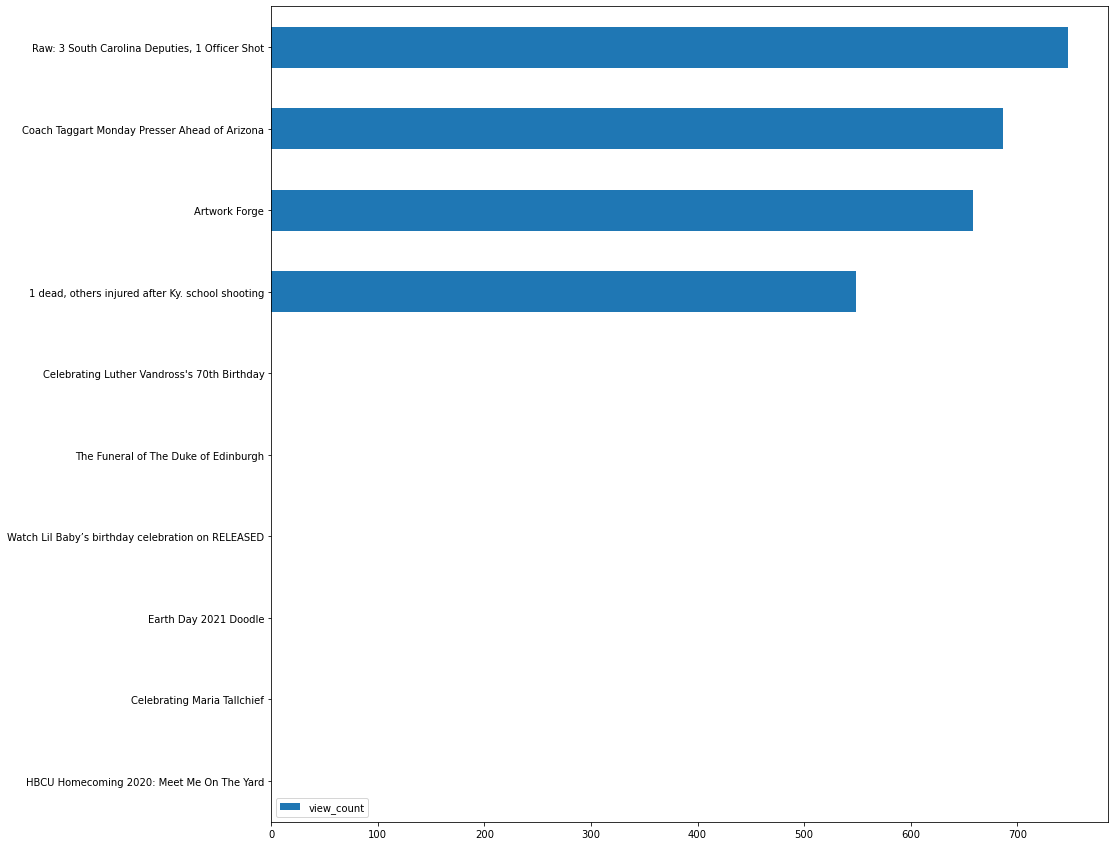

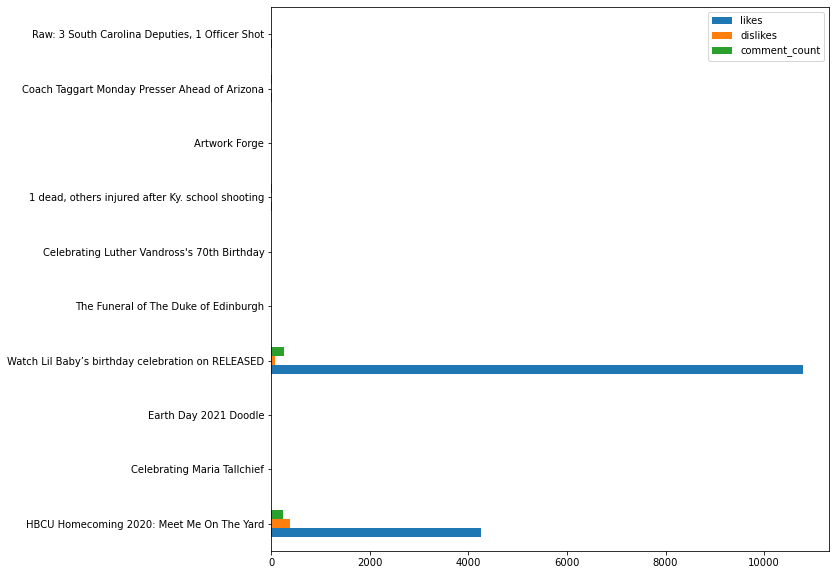

In [703]:
top_data(total_data, ['view_count'], True, 10)

The top ten videos with the least number of views is interesting because it appears that there are a number of videos that did not have any views yet were still put on trending and also have likes and dislikes. Most likely this is due to inconsistencies in the table data, however, it is not unlikely to suggest that the Youtube Algorithm thought that some of these videos would go viral, therefore, put it on the youtube trending page. 

Also another question to ask is how did two of the videos that did not have any views recieve likes, dislikes, and comments?
The most probable answer would be bots on Youtube used to make a video more popular.

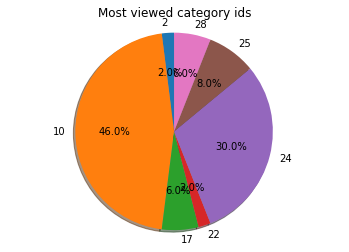

In [730]:
import matplotlib.pyplot as plt
# I sorted the values based on view count for the top 50 videos as my sample
view_count_categories = total_data.sort_values(by = ['view_count'], ascending=False).iloc[:50]
# I aggregated the data sorting by category
view_count_categories = view_count_categories.groupby(by = 'category_id').agg('count')
view_count_categories.reset_index(level=0, inplace=True)
#plotted the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(view_count_categories['video_id'], labels = view_count_categories['category_id'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title("Most viewed category ids")
plt.show()

Here is a pie chart to demonstrate the breakdown of the most watched trending video categories. If you refer to the chart given in the intro, 

| Category ID      | Subject |
| ----------- | ----------- |
| 1      | Film & Animation       |
| 2   | Autos & Vehicles        |
| 10   | Music        |
| 15   | Pets & Animals        |
| 17  | Sports        |
| 18  | Short Movies        |
| 19  | Travel & Events        |
| 20   | Gaming        |
| 21  | Videoblogging        |
| 22   |  People & Blogs        |
| 23  |    Comedy     |
| 24   |   Entertainment   |
| 25   |   News & Politics        |
| 26   |   Howto & Style        |
| 27   |   Education        |
| 28   |   Science & Technology        |
| 29   |   Nonprofits & Activism        |
| 30   |   Movies        |
| 31   |   Anime/Animation        |
| 32   |   Action/Adventure        |
| 33   |   Classics                |
| 34   |   Comedy                |
| 35   |   Documentary           |
| 36   |   Drama                 |
| 37   |   Family                |
| 38   |   Foreign               |
| 39   |   Horror                |
| 40   |   Sci-Fi/Fantasy        |
| 41   |   Thriller              |
| 42   |   Shorts                |
| 44   |   Trailers              |



you can see that the top 3 most watched areas on youtube are music, entertainment and News & Politics.

Here is some visualization on current 2020-2021 trends. As you can see, Lil Nas' Montero was able to make it to the Youtube trending despite having an incredibly controversial music video to the religious community of America. 

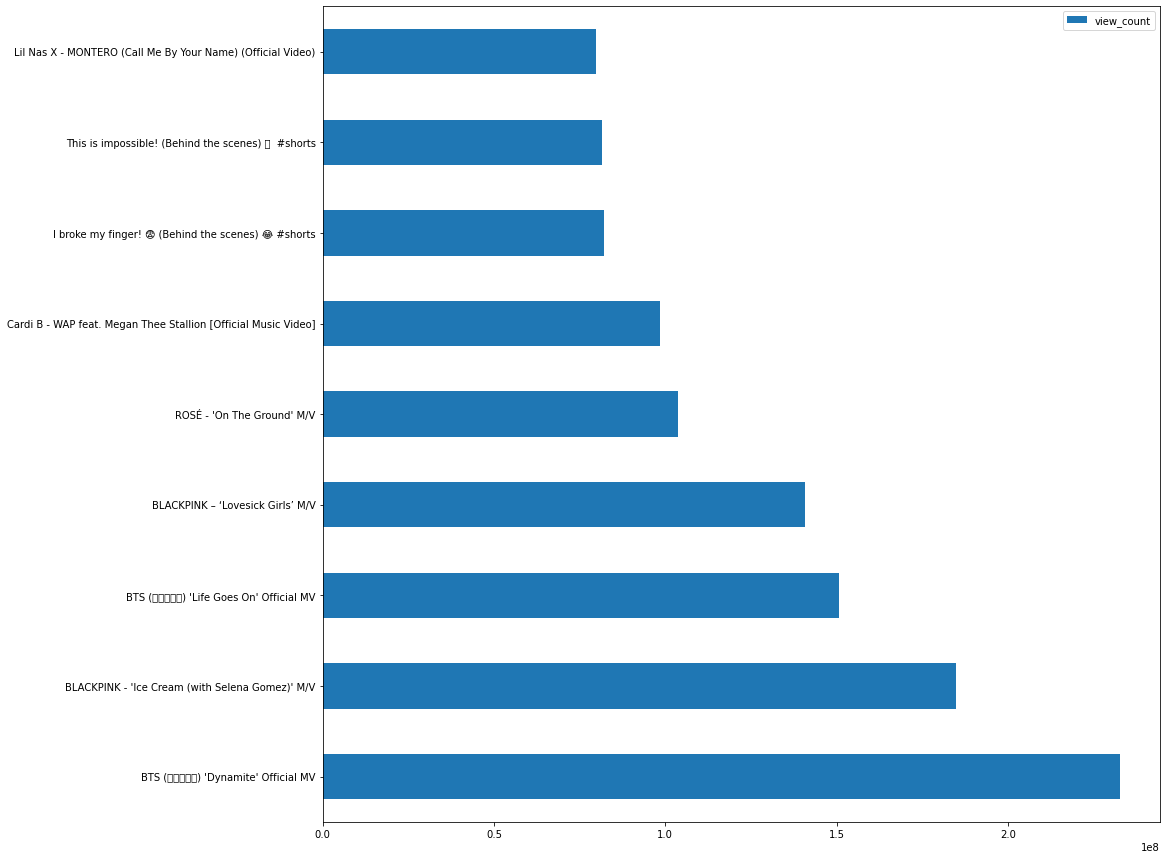

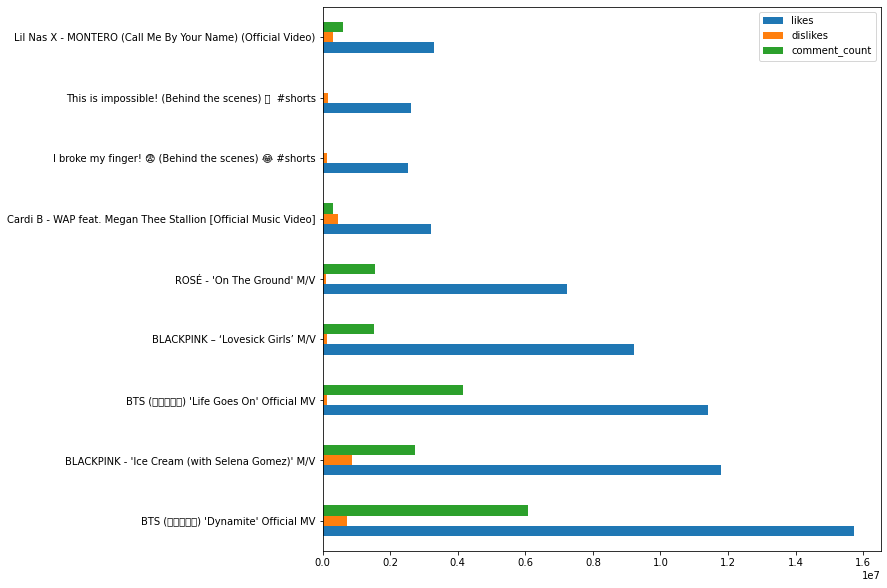

In [728]:
top_data(yr20_21_data, ['view_count'], False, 40)


Here is some visualization on the 2017-2018 trends

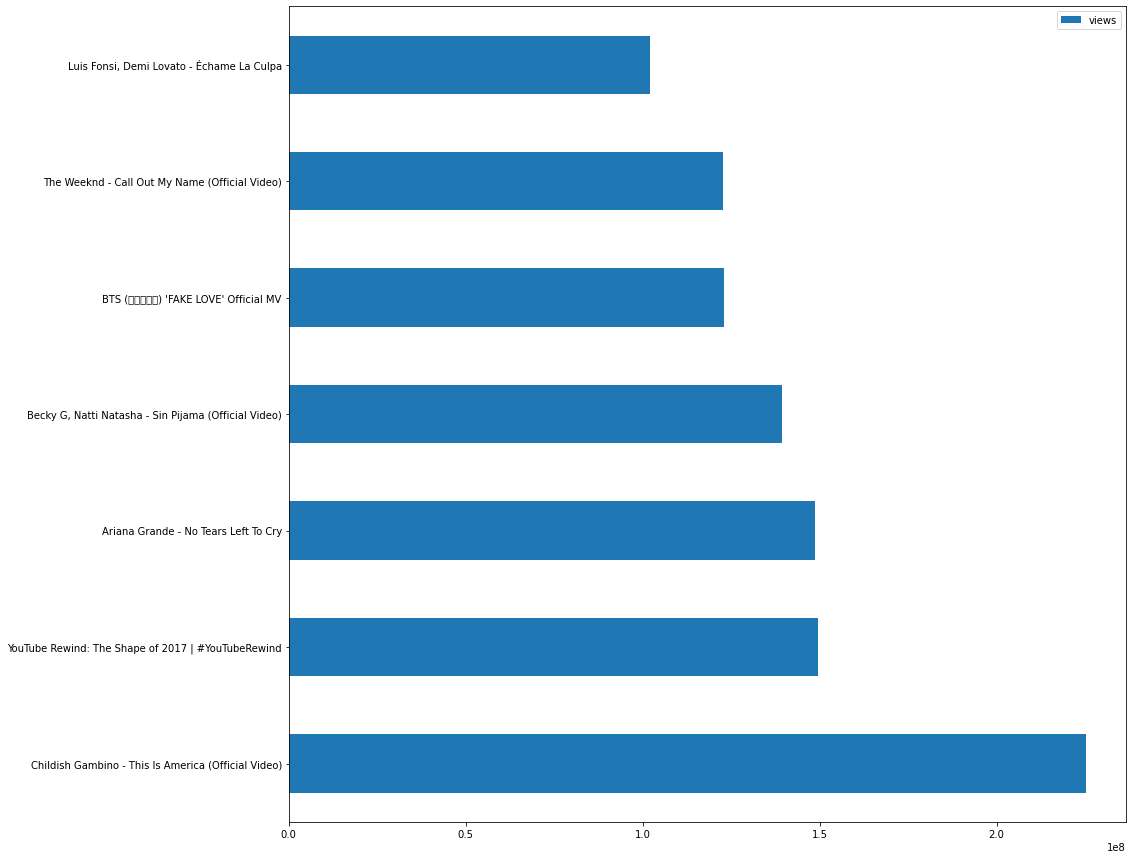

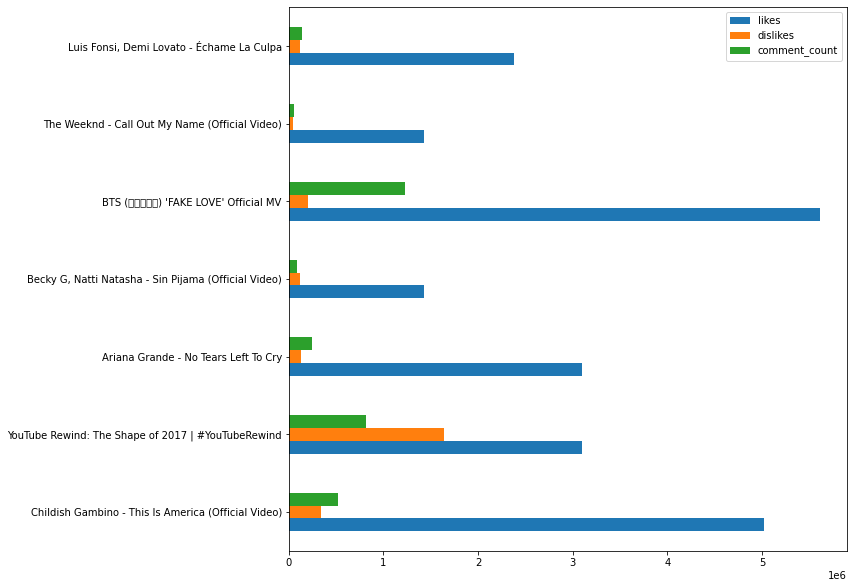

In [705]:
top_data(yr17_18_data, ['views'], False, 40)

Next I wanted to observe the frequency of words occurrences in tags based on years  

In [708]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import *
def word_clouder(tb,type):
    top_views = tb.sort_values(by = [type], ascending=False).iloc[:40]
    top_tags = []
    for col, row in tb.iterrows():
        vid_tags = row['tags'].split('|')
        for j in vid_tags:
            top_tags.append(j)
    stopwords = STOPWORDS.add("None")
    stopwords = STOPWORDS.add("make")
    stopwords = STOPWORDS.add("girl")
    stopwords = STOPWORDS.add("new")
    stopwords = STOPWORDS.add("first take")
    stopwords = STOPWORDS.add("highlight")

    unique_string=(" ").join(top_tags)
    wordcloud = WordCloud(width = 1000, height = 1000, stopwords  = stopwords).generate(unique_string)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)   
    plt.axis("off")
    plt.subplot()
    plt.show()


These are the top words used in tags overall for 2017-2021. As you can see, the majority of the Youtube population in America is interested in a variety of topics from gaming such as Among us and Apex to watching funny videos to tiktok or music.

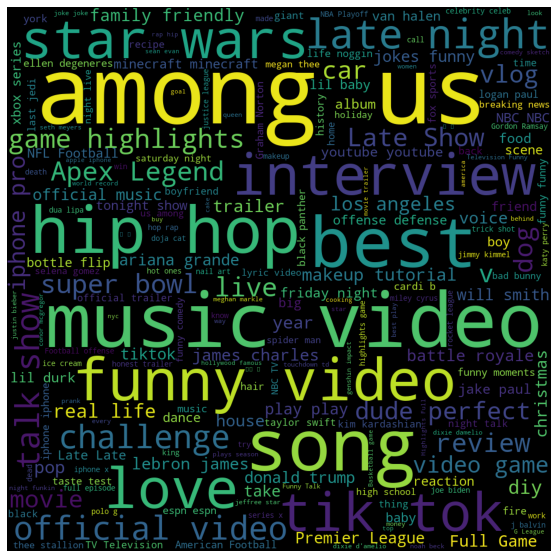

In [709]:
word_clouder(total_data, 'tags')

This is a more curated dataset with all the data only from 2017-2018. There are still some similarities, but most of the trends are more relevant to that year including black panther, star wars, Will Smith's appearance in Youtube rewind: https://www.youtube.com/watch?v=YbJOTdZBX1g&t=2s

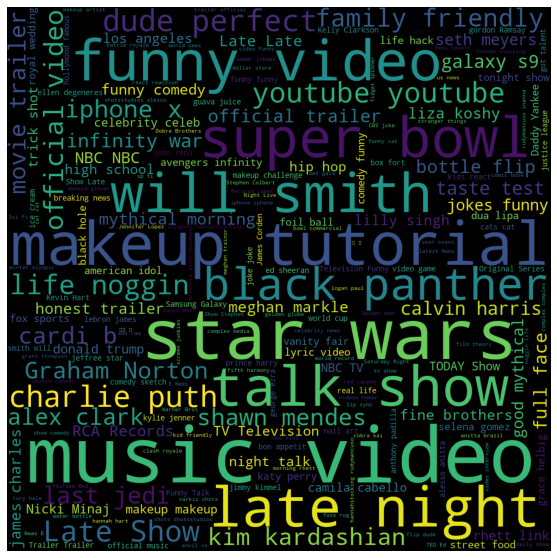

In [710]:
word_clouder(yr17_18_data, 'tags')


This is a more curated dataset with all the data only from 2020-2021. There are still some similarities, but more emphasis on among us, apex legend, tik tok, and james charles.

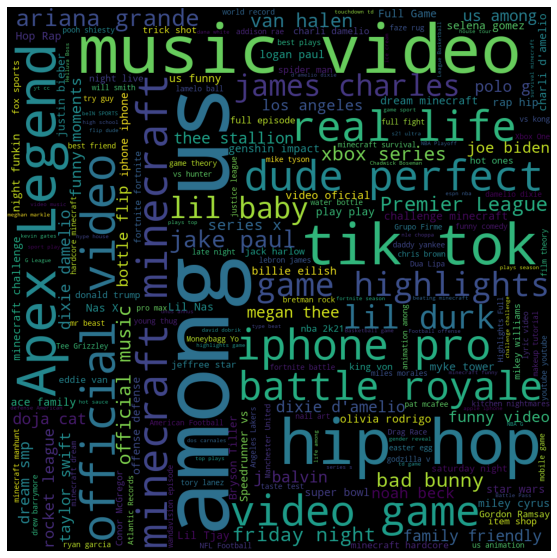

In [711]:
word_clouder(yr20_21_data, 'tags')

Finally, I wanted to take the time to analyze the relationship between tags and ratings_disabled. From this we can gain more insight into what topics may have caused a channel to turn off ratings on their video.

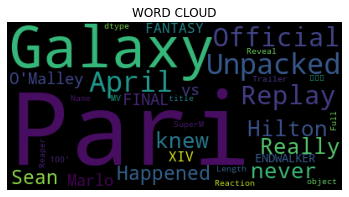

In [712]:
ratings_disabled_tb = yr20_21_data.loc[yr20_21_data['ratings_disabled'] == True]
stopwords = STOPWORDS.add("None")
stopwords = STOPWORDS.add("make")
stopwords = STOPWORDS.add("girl")
stopwords = STOPWORDS.add("new")
stopwords = STOPWORDS.add("ASKED")
stopwords = STOPWORDS.add("GIRLFRIEND")
stopwords = STOPWORDS.add("brings")
stopwords = STOPWORDS.add("FIRST")
stopwords = STOPWORDS.add("Day")

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=40
                         ).generate(str(ratings_disabled_tb['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD")
plt.axis('off')
plt.show()

I did the same as before, but with comments_disabled instead.

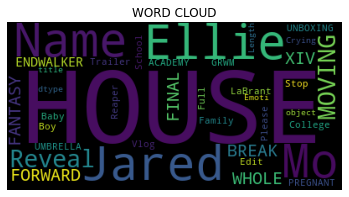

In [713]:
comments_disabled_tb = yr20_21_data[yr20_21_data['comments_disabled'] == True]

stopwords = STOPWORDS.add("None")
stopwords = STOPWORDS.add("make")
stopwords = STOPWORDS.add("girl")
stopwords = STOPWORDS.add("new")
stopwords = STOPWORDS.add("ASKED")
stopwords = STOPWORDS.add("GIRLFRIEND")
stopwords = STOPWORDS.add("brings")
stopwords = STOPWORDS.add("FIRST")
stopwords = STOPWORDS.add("Day")
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=40
                         ).generate(str(comments_disabled_tb['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD")
plt.axis('off')
plt.show()

## Part 4: Linear Regression Model
Since I decided to take two separate tables of different years of youtube data, we are missing all the data from 2019 related to trending videos on Youtube. For this project, I will be predicting the 2019 data from the 2017-2018 and 2020-2021 data. Through this we can better visualize how Youtube determines what videos will be trending. This way we can observe overall trends of what content Youtube tends to deem trending.

First, I decided to import all the data into a new table, dropping columns I felt were unneeded for the linear regression

In [714]:
ml_data = total_data.drop(['video_id', 'publish_time', 'description'], axis = 1)
ml_data['tags'] = ml_data['tags'].replace('|',' ')
# converted boolean to integer
ml_data['comments_disabled'] = ml_data['comments_disabled'].astype(int)
ml_data['ratings_disabled'] = ml_data['ratings_disabled'].astype(int)
ml_data.head()


title  channel_title  \
0                 I ASKED HER TO BE MY GIRLFRIEND...       Brawadis   
1  Apex Legends | Stories from the Outlands – “Th...   Apex Legends   
2  I left youtube for a month and THIS is what ha...  jacksepticeye   
3  XXL 2020 Freshman Class Revealed - Official An...            XXL   
4  Ultimate DIY Home Movie Theater for The LaBran...       Mr. Kate   

   category_id trending_date  \
0           22    2020-08-12   
1           20    2020-08-12   
2           24    2020-08-12   
3           10    2020-08-12   
4           26    2020-08-12   

                                                tags  view_count   likes  \
0  brawadis|prank|basketball|skits|ghost|funny vi...     1514614  156908   
1  Apex Legends|Apex Legends characters|new Apex ...     2381688  146739   
2  jacksepticeye|funny|funny meme|memes|jacksepti...     2038853  353787   
3  xxl freshman|xxl freshmen|2020 xxl freshman|20...      496771   23251   
4  The LaBrant Family|DIY|Interior Design|Makeove...     1123889   45802   

   dislikes  comment_count  comments_disabled  ratings_disabled  
0      5855          35313                  0                 0  
1      2794          16549                  0                 0  
2      2628          40221                  0                 0  
3      1856           7647                  0                 0  
4       964           2196                  0                 0

In [715]:
# Made a new list based on categories
categories_in_order = total_data['category_id']

In [716]:
#converted the years into int64 from datetime64[ns]
ml_data['years'] = ml_data['trending_date'].dt.year
ml_data['years'].head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: years, dtype: int64

I applied a linear regression model to train and predict trends in each category for 2019 based on the data provided. Each category is labeled with their paralleling cateory id 

Coefficient: 161647.399677890
Squared Err: 2865708019244.33
Variance: 0.02


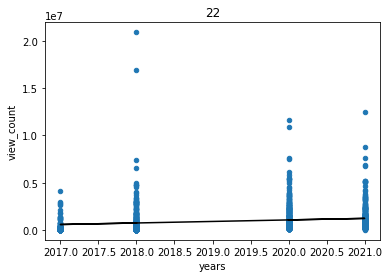

Coefficient: -97931.400404449
Squared Err: 2701594838705.62
Variance: -0.02


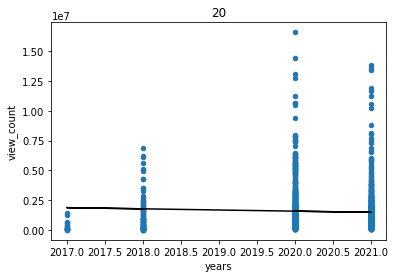

Coefficient: 180819.682448685
Squared Err: 3973760692755.90
Variance: 0.03


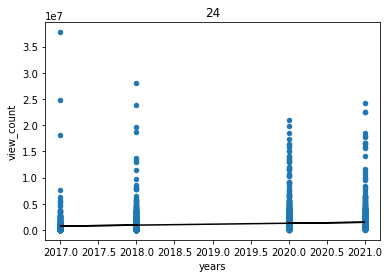

Coefficient: 36728.209920488
Squared Err: 10894195685231.83
Variance: 0.00


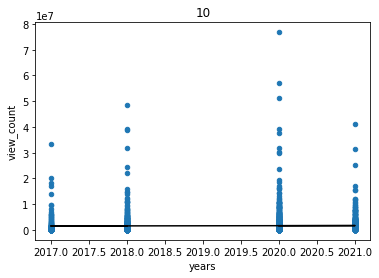

Coefficient: 122960.689212842
Squared Err: 535757504248.79
Variance: -0.02


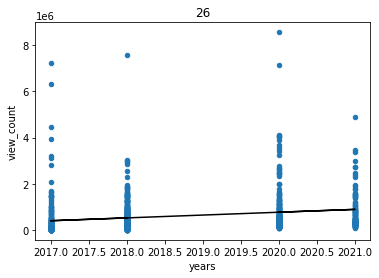

Coefficient: 131882.438122442
Squared Err: 336735736325.52
Variance: 0.09


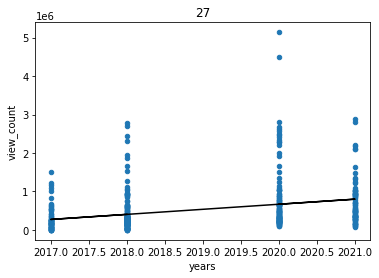

Coefficient: 19083.135470396
Squared Err: 1123567330259.09
Variance: -0.00


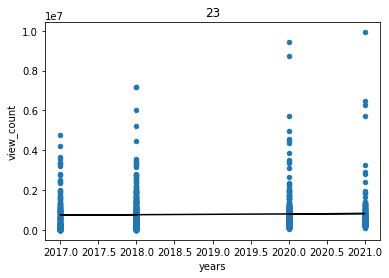

Coefficient: 384787.127667056
Squared Err: 4043206195322.36
Variance: 0.03


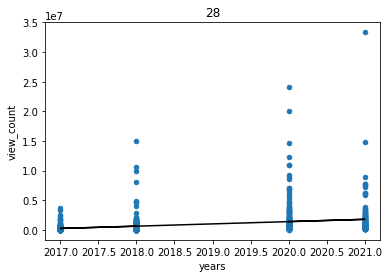

Coefficient: 109023.843916868
Squared Err: 2602971598031.57
Variance: -0.01


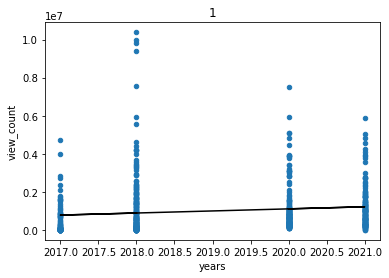

Coefficient: 303780.613883912
Squared Err: 567489852316.55
Variance: -0.02


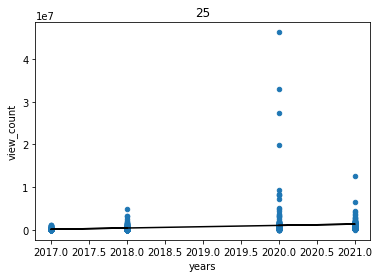

Coefficient: 83140.964014691
Squared Err: 3358464986279.26
Variance: 0.01


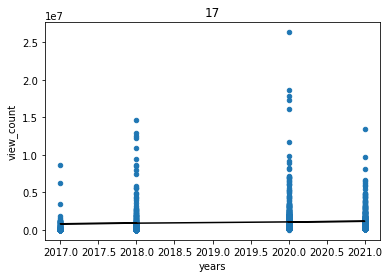

Coefficient: 76168.817836010
Squared Err: 157801413402.74
Variance: -0.19


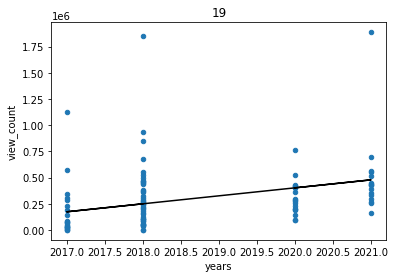

Coefficient: 126004.677585037
Squared Err: 189359814491.01
Variance: -0.16


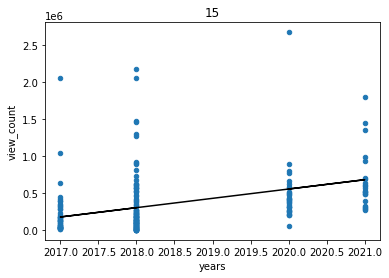

Coefficient: 186728.145708583
Squared Err: 276293484030.70
Variance: -0.27


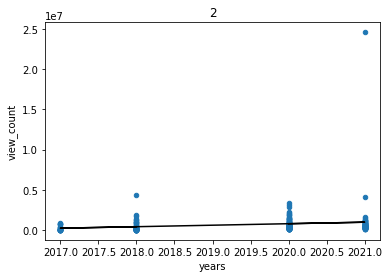

Coefficient: -116467.494301994
Squared Err: 1600894722399.10
Variance: -1018.67


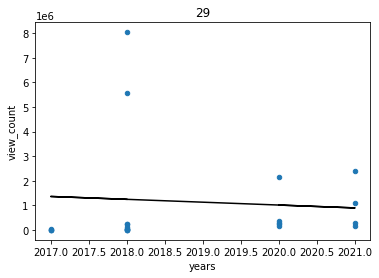

Coefficient: 290958.000000000
Squared Err: 65593868769.00
Variance: nan


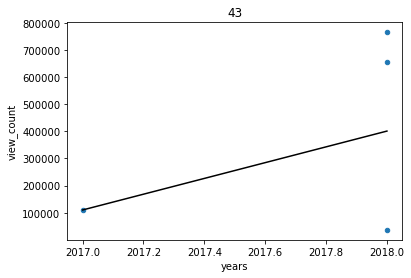

In [725]:
categories = ml_data['category_id'].unique()
category_data = []
for i in categories:
    category_data = ml_data[ml_data["category_id"] == i]
    #Remove unnecessary data columns
    category_data = category_data.drop(columns = ['title', 'channel_title', 'trending_date', 'category_id', 'tags', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'trending_date' ])
    #get the correct data
    x_value = category_data.iloc[:, 1].values.reshape(-1,1)
    y = category_data.iloc[:, :-1].values.reshape(-1,1)

    #train the linear regression model
    x_trainer, x_test, y_trainer, y_test = train_test_split(x_value, y, test_size=0.2, random_state=0)

    linRegress = LinearRegression()
    linRegress.fit(x_trainer, y_trainer)
    print("Coefficient: %.9f" % linRegress.coef_)
    print("Squared Err: %.2f" % np.mean((linRegress.predict(x_test) - y_test) ** 2))
    print('Variance: %.2f' % linRegress.score(x_test, y_test))
    category_data.plot.scatter(x='years', y = 'view_count')

    plt.title(i)
    plt.plot(x_value, linRegress.predict(x_value), color='k')
    plt.show()

From this data, we can observe that 2019 data will continue the current trends mapped from 2017-2021. It is important to note that there are very obvious trends that show in the future that certain categories will exceed others with their positive slope trends such as 19 and 15. This may prove to predict what the future major cateories of Youtube are and what people are mainly interested in.

Next I did a linear regression on years and likes to see if there was any relationship

Coefficient: 20509.911346385
Intercept: -41342620.832740121
Squared Err: 35268308750.56
Variance: 0.02


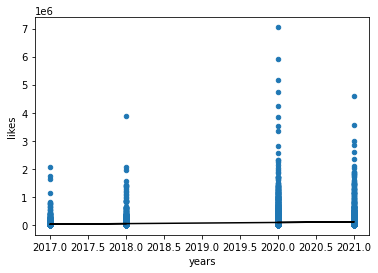

In [647]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data_cp = pd.DataFrame(columns=['years', 'likes'])
data_cp['years'] = ml_data['years']
data_cp['likes'] = ml_data ['likes']
# data_cp
#get the values
x_value = data_cp.iloc[:, :-1].values
y = data_cp.iloc[:, 1].values
#train the values
X_train, X_test, y_train, y_test = train_test_split(x_value, y, test_size=0.2, random_state=0)
#do a linear regression
linRegress = LinearRegression()
#Fit it to the graph
linRegress.fit(X_train, y_train)
print("Coefficient: %.9f" % linRegress.coef_)
print("Intercept: %.9f" % linRegress.intercept_)
print("Squared Err: %.2f" % np.mean((linRegress.predict(x_test) - y_test) ** 2))
print('Variance: %.2f' % linRegress.score(x_test, y_test))

#make a scatter plot
ml_data.plot.scatter(x='years', y = 'likes')
#add the linear regression line
plt.plot(x_value, linRegress.predict(x_value), color='k')
plt.show()

In 2020, there was significantly more likes than in past years. Given the context of the pandemic,it is plausible to believe that more people would be watching youtube videos because everything was remote and online. This carries over into the current 2021 data as well. However, where the linear regression model fails is in the unexpected event of the pandemic. The linear regression line simply shows a gradual increase of likes over time, therefore, does not take into account the true nature of the spike in likes.

Following this I made a violin plot of the likes vs year to further show that the number of likes was much higher than in past years

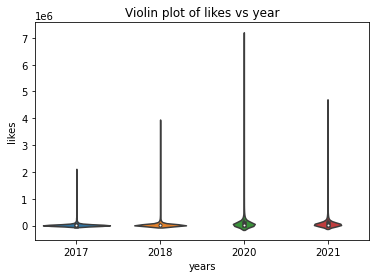

In [734]:
ml_data['years'].unique
sns.violinplot(x = 'years', y = 'likes', data = ml_data, bw =.3 )
plt.title("Violin plot of likes vs year")
plt.show()

In [ ]:
I also plotted the residuals of the likes to years

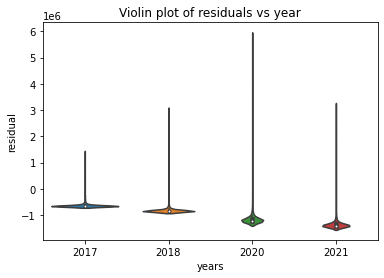

In [735]:
ml_data['years'].unique
#make a violin plot
ml_data['residual'] = ml_data['likes'] - (linRegress.intercept_ + linRegress.coef_[0]*ml_data['years'])

sns.violinplot(x = 'years', y = 'residual', data = ml_data, bw =.3 )
plt.title("Violin plot of residuals vs year")
plt.show()

##Conclusion
The purpose of this project, was not necessarily to determine any new information, but rather to show how the US Youtube trending reflects many of our past and current trends in America. It was also used to show how we can predict the 2019 data, despite the impact of the coronavirus on the US

In our hypothesis testing, I decided to pick variables based on how significant they were in the correlation matrix, ultimately decidings on likes over time. However, this may not have been the best decision because I failed to get rid of the 2021 data. Since 2021 is not complete, we were not able to determine the exact relationship between like and specific years, 

In addition, the hypothesis testing and ML that included 202-2021 data poorly reflects on the overall trends in America because they fail to take into consideration a pandemic.

Here were the main resources I used:
- https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0
- https://techpostplus.com/youtube-video-categories-list-faqs-and-solutions/
- https://www.dataquest.io/blog/python-datetime-tutorial/



